In [1]:
# Import the required modules and lib
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, datetime as dt

In [2]:
#Import the warnings to ignore it
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load and read the given data file of type csv
df = pd.read_csv('loan.csv')

## **Section 1: Understanding of the data**

In [5]:
# Describe the data frame
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
# get the detailed info such as datatype, number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# checking the available loan status
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

## **Section 2: Cleaning of the data**

**2.1: Rows**

In [10]:
# removing the set of data where the loan status value is "Current"
df = df[df['loan_status'] != 'Current']

In [11]:
# checking the available loan status after deletion
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [12]:
# identifying the duplicate data if any
duplicate_data = df.duplicated()
df[duplicate_data]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [13]:
# Identifying the total count of rows left after the cleanup done for the row section
df.shape

(38577, 111)

**2.2: Columns**

In [15]:
# checking for null values in all the columns with the count
print("Number of null valuues in each column:\n",df.isnull().sum())

Number of null valuues in each column:
 id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64


In [16]:
# getting the list of the columns containing null value (note: all includes null && na, whereas any includes null || na)
columns_with_nulls = df.columns[df.isnull().all()].tolist()

# Output the columns with null values with its count
print("Columns with null values:\n", len(columns_with_nulls))
columns_with_nulls

Columns with null values:
 55


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [17]:
# now delete the columns with null and na values
df = df.drop(columns=columns_with_nulls)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [18]:
# Identify unique columns
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['id', 'member_id', 'url']

In [19]:
# Deleting the columns (member_id & url) which will not be used for unique identification
column_to_keep = 'id'
unique_columns.remove(column_to_keep)
df = df.drop(columns=unique_columns)
df.shape

(38577, 54)

In [20]:
# Deleting the subgroup as we want to maintain the table at group level
df = df.drop(columns='sub_grade')
df.shape

(38577, 53)

In [21]:
# Deleting single value columns since it will have same value
single_value_col = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=single_value_col)
df.shape

(38577, 42)

In [22]:
#Deleting columns containing the text which do not contribute to EDA such as (desc, title, emp_title)
df = df.drop(columns= ['desc','title','emp_title'])
df.shape

(38577, 39)

In [23]:
#Deleting post loan approval data (behaviourial data) as it will not contribute to EDA
post_apprvl_col=['inq_last_6mths','delinq_2yrs','earliest_cr_line','last_pymnt_amnt','open_acc', 'pub_rec','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d','revol_bal','revol_util','total_acc']
df=df.drop(columns=post_apprvl_col)
df.shape

(38577, 21)

In [24]:
# Identify and deleting columns with more than 50% either blank values or null values 
threshold = len(df) * 0.5
columns_to_drop = [col for col in df.columns if (df[col].isnull().sum() > threshold) or ((df[col] == '').sum() > threshold)]
df = df.drop(columns=columns_to_drop)
df.shape

(38577, 19)

## **Section 3: Data Manipulation/Conversion**

In [26]:
#Checking the data type of each column
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [27]:
# Converting the integer data type to float expect id
df = df.astype({'loan_amnt': 'float', 'funded_amnt': 'float'})
df.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [28]:
# Checking and Converting the term to int type
df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [29]:
df['term'] = df['term'].str.replace(' months', '', regex=False).astype('int64')
df.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [30]:
# Checking and Converting 'int_rate' from object to float64
df['int_rate'].value_counts()
df['int_rate'] = df['int_rate'].str.replace('%', '', regex=False).astype(float)
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [31]:
# Checking and Converting 'int_rate' from object to float64
df['emp_length'].value_counts()
df['emp_length'] = df['emp_length'].apply(lambda x:x.strip("years").strip("<").replace(" ","").replace("+","") if isinstance(x, str) else x)
df['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [32]:
# Converting 'issue_d' to date type.
df['issue_d'] = pd.to_datetime(df.issue_d, format = '%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [33]:
# Rounding off colmns to 2 digit points.
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df[col] = df[col].apply(lambda x: round(x,2))
    print(df[col])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [34]:
# Checking for any possible colmns with null fields
(df.isnull().sum()*100/len(df))

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [35]:
# dropping 'emp_length' and 'pub_rec_bankruptcies' as they have less null rows.
df = df.dropna(subset= ['emp_length','pub_rec_bankruptcies'])
new_rows= len(df)
new_rows

36847

In [36]:
df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [37]:
df.shape

(36847, 19)

## **Section 4: Dervied Columns**

In [39]:
# Creation of Derived Colmns: issue_month and issue year from 'issue_d'
df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month

In [40]:
# Creation of default colmmn, which marks the state of loan, i.e Default State.
# Defining which loan statuses we consider as default/
default_status =  ['Charged Off', 'Default']

# Creation of 'is_default' column: 1 for default loans, 0 for fully paid loans
df['is_default'] = df['loan_status'].apply(lambda col: 1 if col in default_status else 0)

# Checking if the col has been created properly
df[['loan_status', 'is_default']].head()

,loan_status,is_default
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
5,Fully Paid,0


In [41]:
# Checking first few rows
df[['loan_status', 'is_default']].value_counts()

loan_status  is_default
Fully Paid   0             31566
Charged Off  1              5281
Name: count, dtype: int64

## **Section 5: Data Visualization**

### **Section 5.1: Outlier Detection**

### **5.1.1.a: Box Plot for Loan Amount**

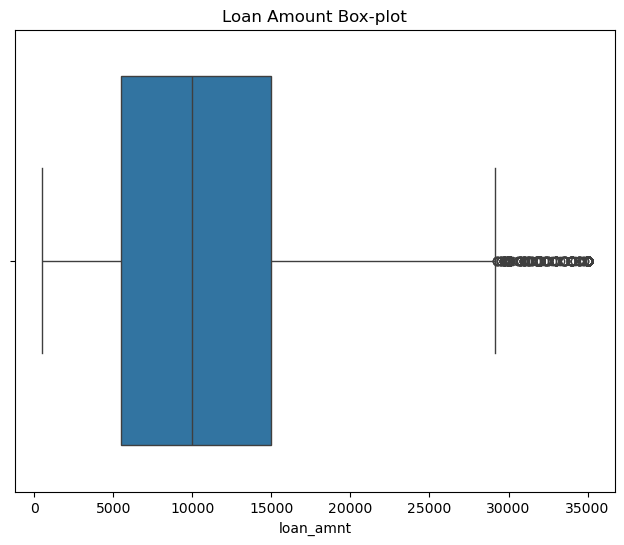

In [45]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['loan_amnt'])
plt.title('Loan Amount Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

In [46]:
# Handeling the Outliers

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['loan_amnt'] = np.clip(df['loan_amnt'], lower_limit, upper_limit)

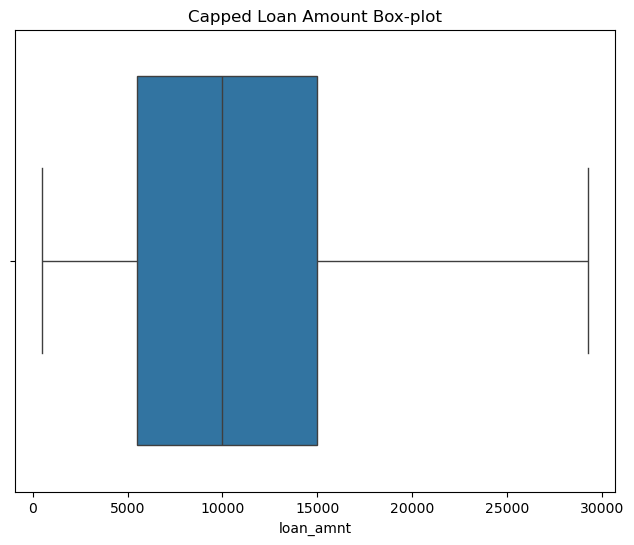

In [47]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['loan_amnt'])
plt.title('Capped Loan Amount Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

### **5.1.1.b: Box Plot for Annual Inc**

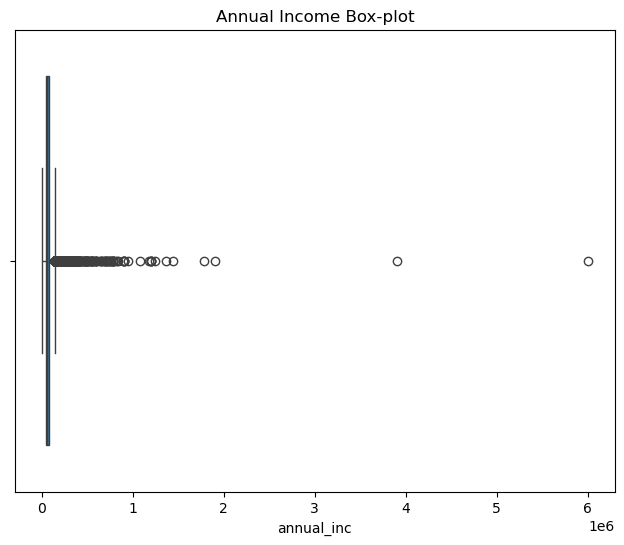

In [49]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['annual_inc'])
plt.title('Annual Income Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

In [50]:
# Handeling the Outliers

Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['annual_inc'] = np.clip(df['annual_inc'], lower_limit, upper_limit)

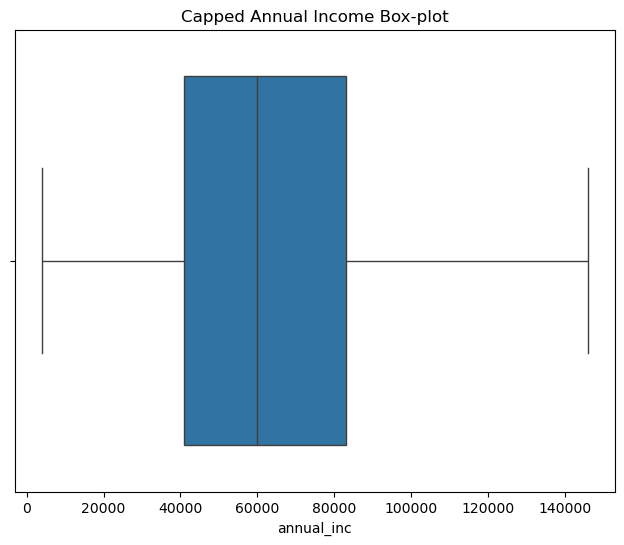

In [51]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['annual_inc'])
plt.title('Capped Annual Income Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

### **5.1.1.c: Box Plot for Interest Rate**

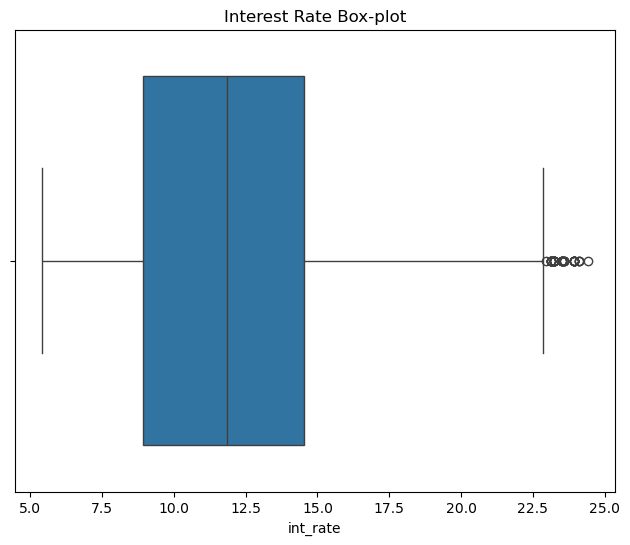

In [53]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['int_rate'])
plt.title('Interest Rate Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

In [54]:
# Handeling the Outliers

Q1 = df['int_rate'].quantile(0.25)
Q3 = df['int_rate'].quantile(0.75)
IQR = Q3 - Q1

# Upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['int_rate'] = np.clip(df['int_rate'], lower_limit, upper_limit)

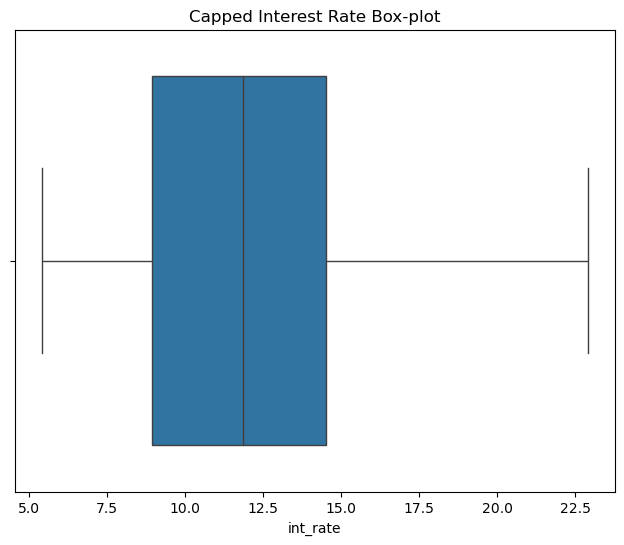

In [55]:
# Set figure size for better visualization and centering
plt.figure(figsize=(10, 6))  # Slightly increase the width
sns.boxplot(x= df['int_rate'])
plt.title('Capped Interest Rate Box-plot')# Adjust the plot layout to make it centered
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust the values further for fine-tuning
plt.show()

## **5.1.2: EDA**

In [57]:
# Basic structure and data types of the dataset
df.info()

# Summary stats for numarical colm
df.describe()

# First few rows of the dataset to get a sense of the data
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  object        
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status          

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,is_default
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1,RENT,...,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,1
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10,RENT,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10,RENT,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3,RENT,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,0


In [58]:
# Target variable 'loan_status' and Distribution of loan_status
df['loan_status'].value_counts()

loan_status
Fully Paid     31566
Charged Off     5281
Name: count, dtype: int64

## **5.1.2.a: Univariate Analysis**

#### For Numerical Variables(loan_amnt, int_rate, etc)

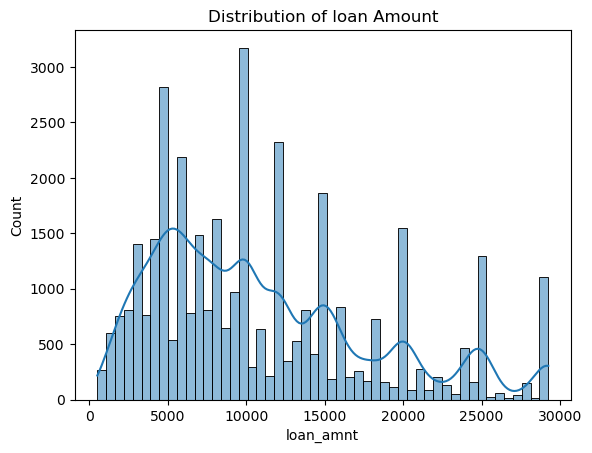

In [61]:
# Loan Amount distribution
sns.histplot(df['loan_amnt'], kde = True)
plt.title('Distribution of loan Amount')
plt.show()

**Insights:** The histogram reveals that the majority of loans are for smaller amounts, but there is also a notable presence of larger loans, reflecting varied borrowing requirements.

**Business Sense:** Given the higher loan amounts, the lender may need to refine their risk evaluation models to better manage the increased potential risks associated with these larger sums.

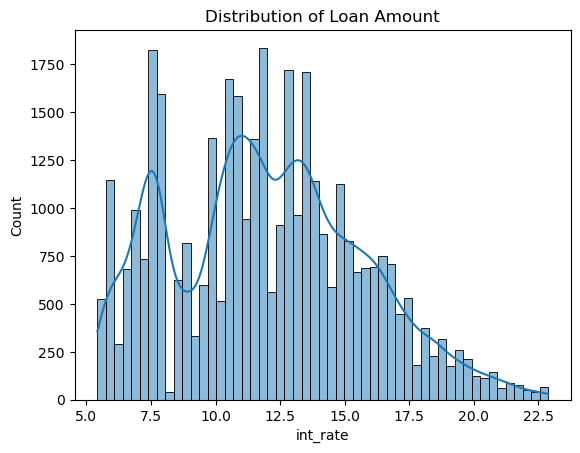

In [63]:
# Interest rate distribution
sns.histplot(df['int_rate'], kde = True)
plt.title('Distribution of Loan Amount')
plt.show()

**Insights:** The histogram reveals that most loans have interest rates centered around 12.5%, but there is a significant presence of larger loans with higher rates.

**Business Sense:** Higher interest rates typically indicate borrowers with increased risk. Therefore, the lender must be diligent in assessing the potential default risk across different interest rate brackets.

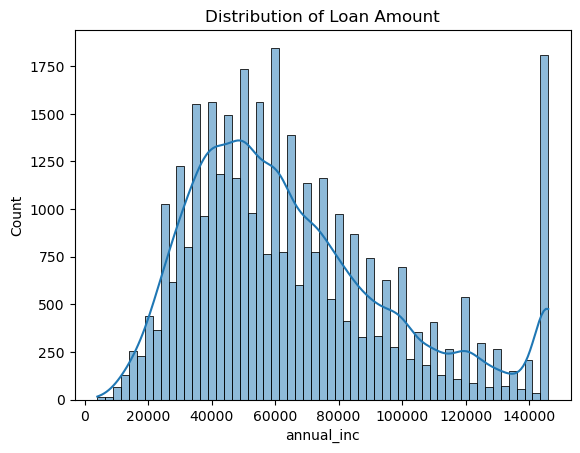

In [65]:
# Annual Income distribution
sns.histplot(df['annual_inc'], kde = True)
plt.title('Distribution of Loan Amount')
plt.show()

**Insights:** The histogram indicates that while the majority of borrowers report incomes around 60,000, there is a considerable portion of borrowers with higher income levels.

**Business Sense:** Higher income borrowers might have lower default risk. The lender could use income as a factor in their credit risk assessment

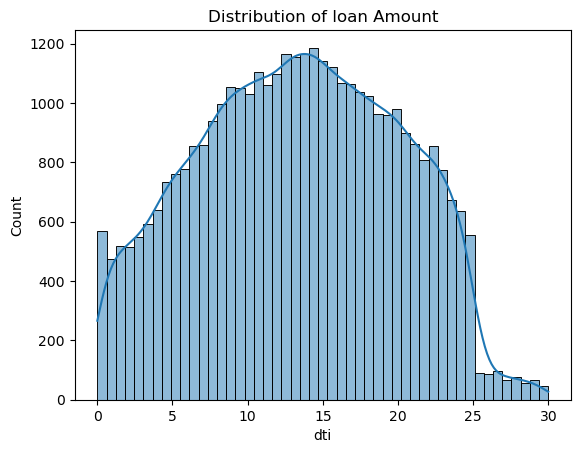

In [67]:
# Debt-to-Income distribution
sns.histplot(df['dti'], kde = True)
plt.title('Distribution of loan Amount')
plt.show()


**Insights:** The histogram indicates that although the majority of borrowers have a debt-to-income (DTI) ratio close to 15, there is a notable number of borrowers with higher ratios.

**Business Sense:** A higher debt-to-income (DTI) ratio is typically linked to an increased risk of default. The lender could incorporate DTI as a crucial element in evaluating credit risk.

Since elevated DTI ratios often correlate with greater default risk, lenders may consider using this metric as a key factor in their credit risk evaluation process.

#### For Categorical Variables(grade, home_ownership, etc)

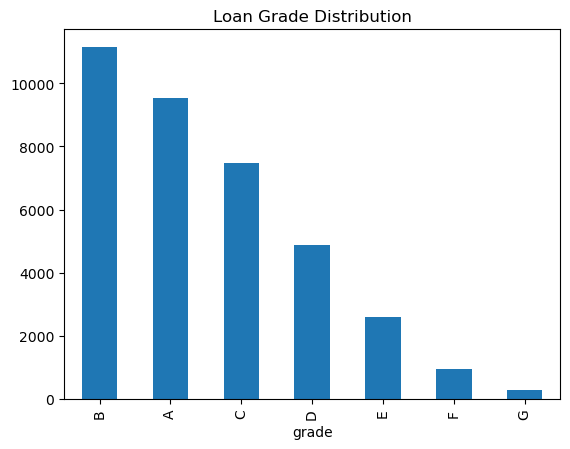

In [70]:
# loan Grade Distribution
df['grade'].value_counts().plot(kind='bar', title='Loan Grade Distribution')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

**Insights:** The majority of loans are issued with grades B and A, including the most borrowers are considered to be in the lower risk categories.

**Business Sense:** To minimize default rates and improve profitability, the lender appears to be focusing on lower-risk borrowers which is a strategic decision

<Axes: title={'center': 'Home Ownership Distribution'}, xlabel='home_ownership'>

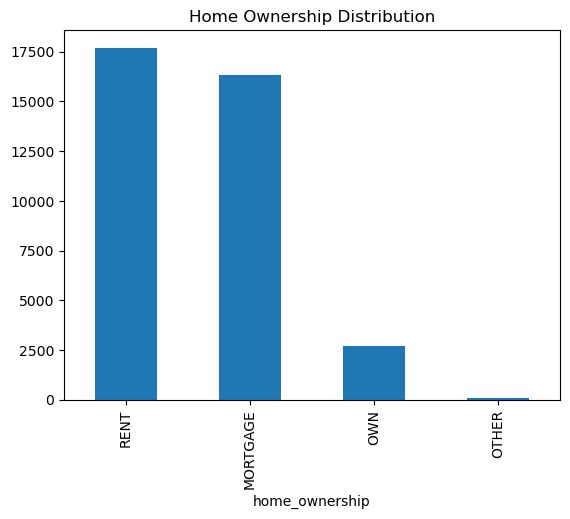

In [72]:
# Home ownership Distribution
df['home_ownership'].value_counts().plot(kind = 'bar', title = 'Home Ownership Distribution')

**Insights:** The majority of borrowers are either renting or have a mortage.

**Business Sense:** Home ownership might be considered a factor in credit risk assessment, as homeowners might be preceived as more stable and less likely to be default.

<Axes: title={'center': 'Employement Length Distribution'}, xlabel='emp_length'>

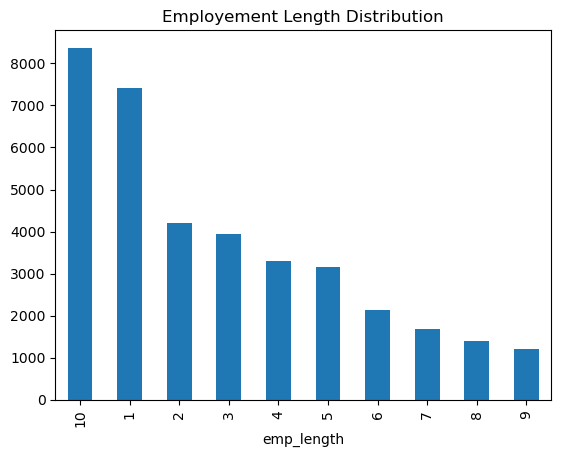

In [74]:
# Employment length Distribution
df['emp_length'].value_counts().plot(kind = 'bar', title = 'Employement Length Distribution')

**Insights:** The category 10 has the highest frequency, indicating that a significant portion of borrowers have been employed for 10 or more/year.

**Business Sense:** Longer employement history might be considered a positive factor in credit risk assessment, as it suggests stability and financial responsibility.

### **5.1.2.b: Segmented Univariate Analysis**

#### **5.1.2.b.i: Loan Amount vs Default**

<Axes: xlabel='is_default', ylabel='loan_amnt'>

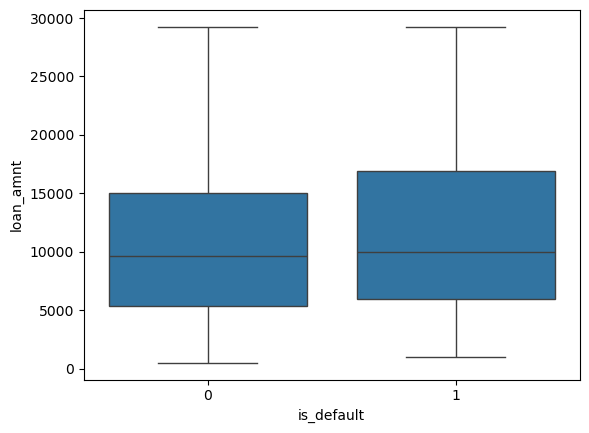

In [78]:
# loan amount segmented by Default Status
sns.boxplot(x= 'is_default', y= 'loan_amnt', data = df)

# Defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:** The IQR(interquartile range) and overall spread of the data seems to be similar for both groups. This indicates that the variability in loan amounts is comparable btw defaulters and non defaulters.

**Business Sense:** While loan amount might not be a strong predictor of default on its own, it could be useful when combined with other factors.

#### **5.1.2.b.ii: Interest Rate vs Default**

<Axes: xlabel='is_default', ylabel='int_rate'>

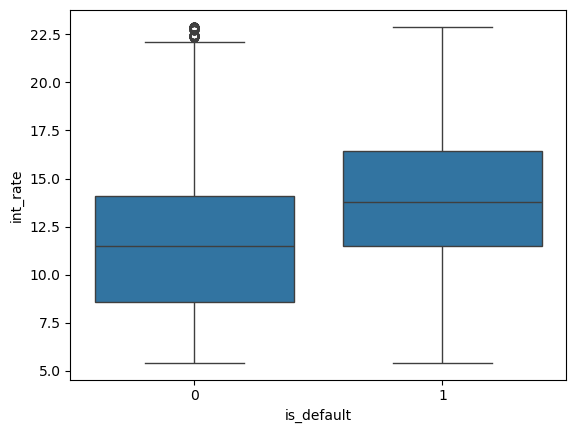

In [81]:
# loan amount segmented by Default Status
sns.boxplot(x= 'is_default', y= 'int_rate', data = df)

# Defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:** The median interest rate of defaulters appears to be slightly higher than non defaulters. This suggests that borrowers who defaulted on their loans might have been charged higher interest rates.

**Business Sense:** The slightly higher median rate of defaulter suggests that interest rate might be a factor influencing default risk

#### **5.1.2.b.iii: Debt-to-income vs Default**

<Axes: xlabel='is_default', ylabel='dti'>

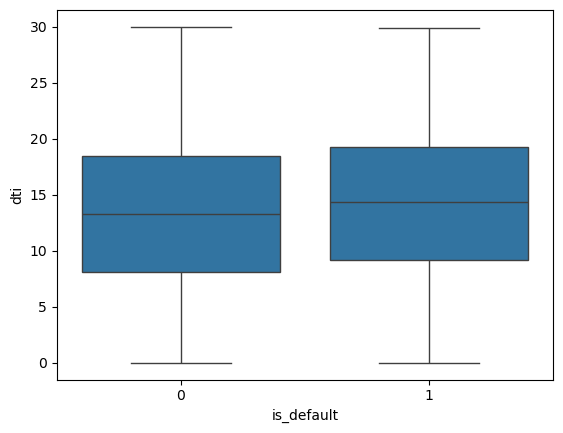

In [84]:
# dti segmented by Default Status
sns.boxplot(x= 'is_default', y= 'dti', data = df)

# Defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:** The interquartile range(IQR) and overall spread of the data seems to be similar. This indicates that the variabilitiy in DTI is comparable between defaulters and non defaulters.

**Business Sense:** The lender could consider incorporating DTI into their credit risk assessment.

In [86]:
#### **5.1.2.b.iv: Numerical vs Categorical**

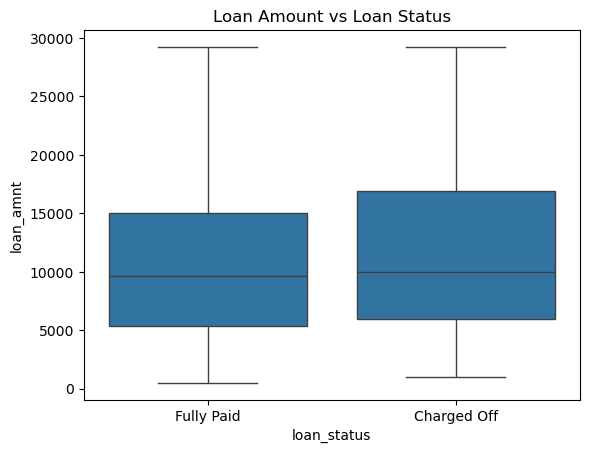

In [87]:
# 1. Loan amount vs Loan Status
sns.boxplot(x= 'loan_status', y= 'loan_amnt', data = df)
plt.title('Loan Amount vs Loan Status')
plt.show()

**Insights:** The median loan amount for 'Charged Off' loans appears to be slightly higher than that for 'Fully Paid' loans. This suggests that borrowers who defaulted on their loans might borrow larger amount.

**Business Sense:** The lender could consider incorporating loan amount into their credit risk assessment models.

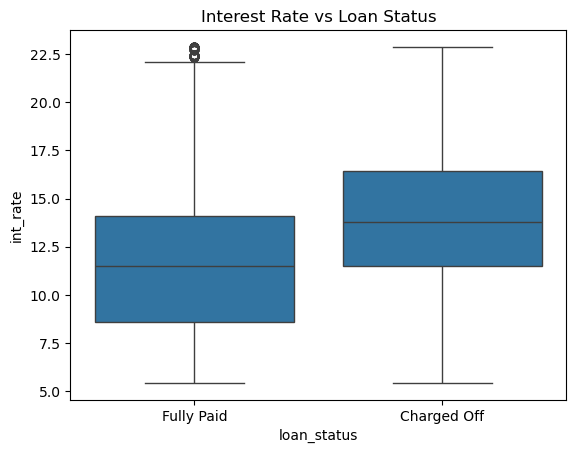

In [89]:
# 2. Interest Rate vs Loan Status
sns.boxplot(x= 'loan_status', y= 'int_rate', data = df)
plt.title('Interest Rate vs Loan Status')
plt.show()

**Insights:** The median loan amount for 'Charged Off' loans appears to be slightly higher than that for 'Fully Paid' loans. This suggests that borrowers who defaulted on their loans might borrow larger amount.

**Business Sense:** The higher median interest rate for defaulters suggests that interest rate might be a contributing factor to default risk.

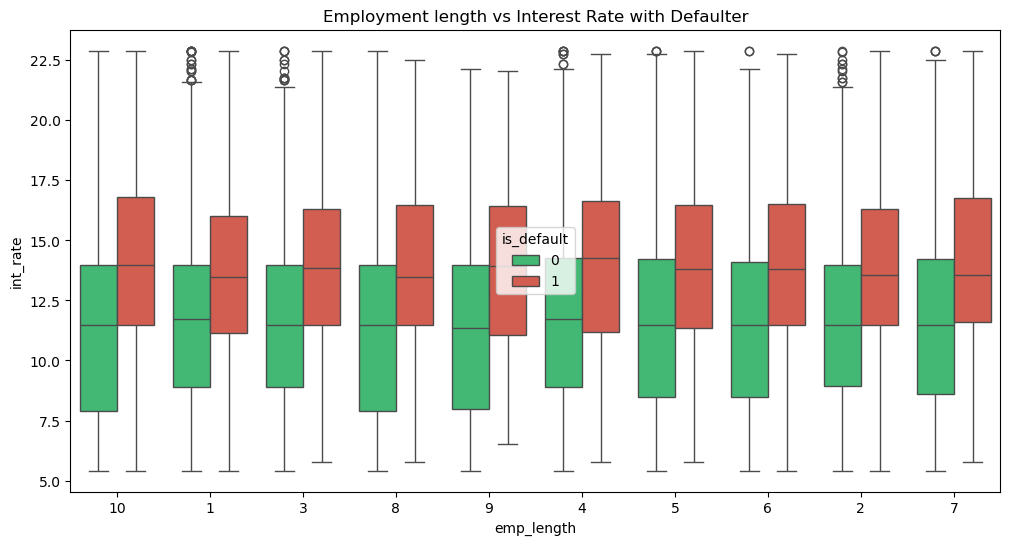

In [91]:
# Employment length vs Interest Rate with Defaulter
plt.figure(figsize=(12,6))
sns.boxplot(x='emp_length', y='int_rate', hue='is_default', data=df, palette=['#2ecc71', '#e74c3c'])  # with green and red colors
plt.title('Employment length vs Interest Rate with Defaulter')
plt.show()

**Insights:** The boxplot reveals a minor overlap in interest rates between defaulters and non-defaulters across various employment lengths.

**Business Sense:** The lender might want to integrate employment length into their credit risk assessment models, especially if it demonstrates a correlation with other factors.

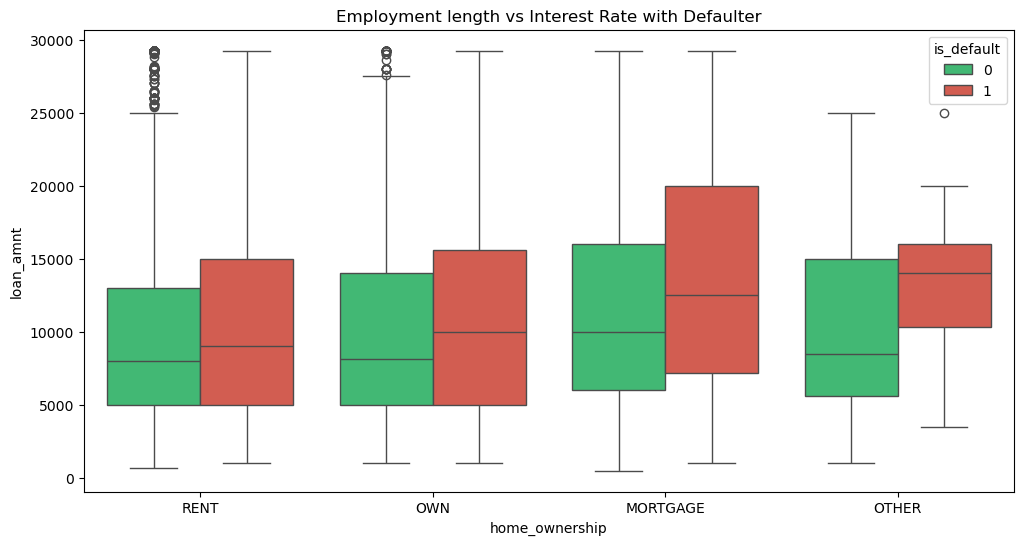

In [93]:
# Home Ownership vs Loan Amount with Defaulter
plt.figure(figsize =(12,6))
sns.boxplot(x= 'home_ownership', y= 'loan_amnt', hue='is_default', data = df, palette=['#2ecc71', '#e74c3c'])
plt.title('Employment length vs Interest Rate with Defaulter')
plt.show()

**Insights:** The median loan amount for the RENT and MORTAGE categories appear to be higher than the OWN and OTHER categories. This suggests that borrowers who are renting or having a mortage tends to borrow larger amounts.

**Business Sense:** The lender could consider incorporating home ownership into their credit risk assessment models, if it shows correlation with other variables.

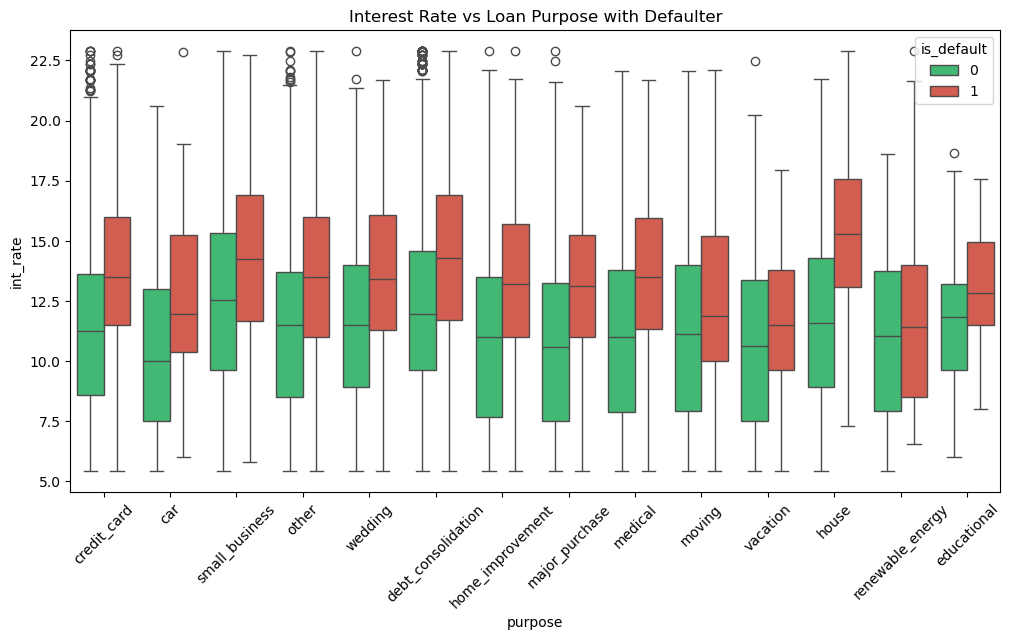

In [95]:
# Interest Rate vs Loan Purpose with Defaulter
plt.figure(figsize =(12,6))
sns.boxplot(x= 'purpose', y= 'int_rate', hue='is_default', data = df, palette=['#2ecc71', '#e74c3c'])
plt.xticks(rotation=45)
plt.title('Interest Rate vs Loan Purpose with Defaulter')
plt.show()

**Insights:** Interest rates vary slightly across different loan purposes, with some showing consistently higher or lower median rates compared to others.

**Business Sense:** The lender may want to factor in loan purpose when developing their credit risk assessment models.

## **5.1.2.b: Correlation Analysis**

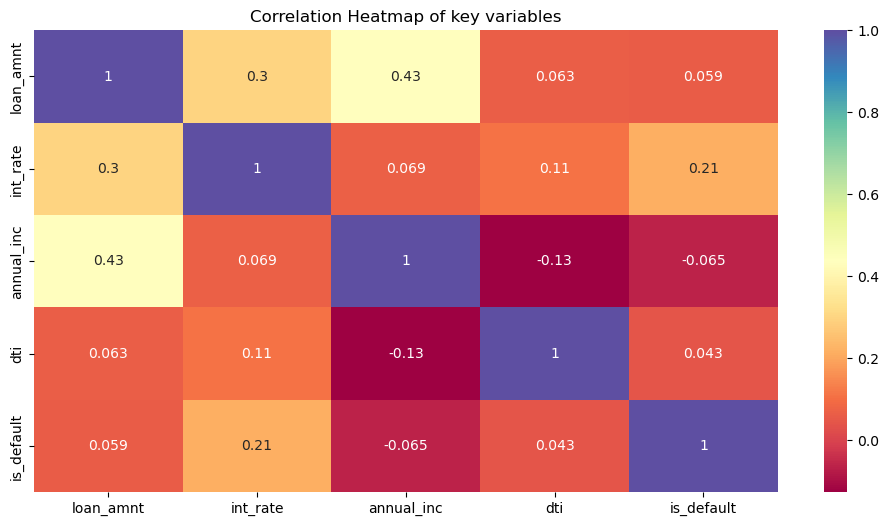

In [98]:
# HeatMap
plt.figure(figsize =(12,6))
correlation = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'is_default']].corr()
sns.heatmap(correlation, annot = True, cmap = 'Spectral')
plt.title('Correlation Heatmap of key variables')
plt.show()

**Insights:** 

    1. Strong Positive Correlation: loan_amt and annual_inc with correlation 0.43, suggesting that borrowers with higher incomes tends to borrow larger amount.
    2. Weak Positive Correlation: loan_amt and int_rate with correlation 0.3, annual_inc and int_rate with correlation 0.069. Indicating borrowers with higher income or larger loan amounts could be charged higher interest rates.
    3.Negative Correlation: annual_inc and is_default with correlation -0.065.

**Business Sense:** The lender could consider incorporating annual_inc and dti into their credit risk assessment models.

## **Section 6: Data Analysis**

<Axes: xlabel='issue_year'>

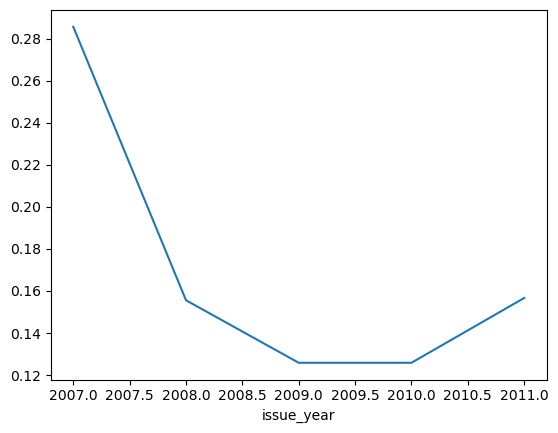

In [101]:
# Analysis of default rate change w.r.t issue_year col 
df.groupby('issue_year')['is_default'].mean().plot(kind= 'line')

**Insights:** The default rate seems to have dropped between 2007 and 2009, hitting its lowest in 2009, before rising slightly in 2010 and 2011.

**Business Sense:** The lender could examine the factors behind the decrease in default rates and use those insights to inform their product development strategies.

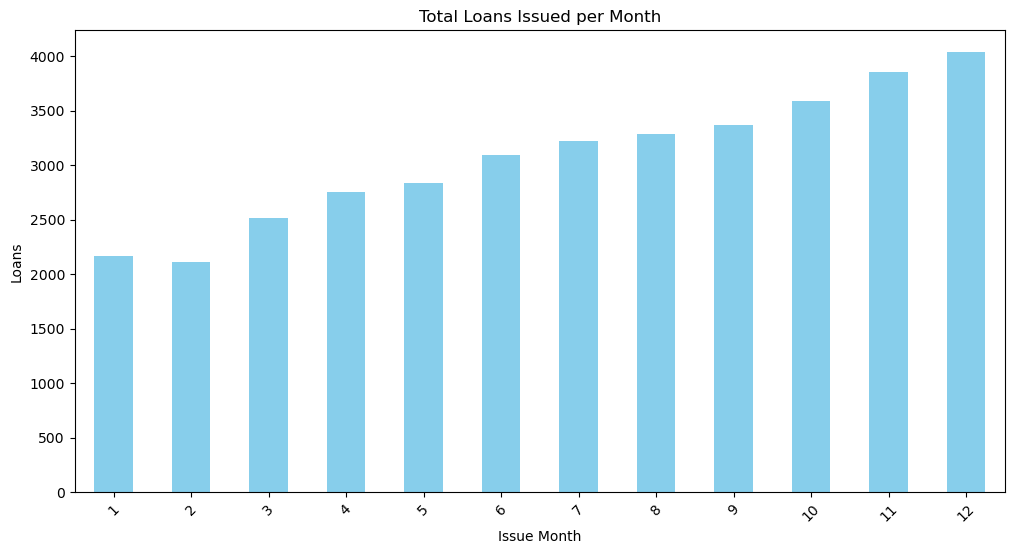

In [103]:
# Count of loans issued by month
loan_counts = df['issue_month'].value_counts().sort_index()
plt.figure(figsize =(12,6))
loan_counts.plot(kind= 'bar', color = 'skyblue')
plt.title('Total Loans Issued per Month')
plt.xlabel('Issue Month')
plt.ylabel('Loans')
plt.xticks(rotation=45)
plt.show()


**Insights:** The number of loans issued tends to rise steadily from month 1 to month 12, indicating an upward trend in lending activity over the course of the year.

**Business Sense:** The lender could investigate the factors behind the growing loan demand to uncover potential development opportunities.